<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Unsupervised Learning (Principal Component Analysis)</h2>
<h4>DAT-5303 | Machine Learning
<br> Reecha Singh</h4>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3> Question 1: Introduction to the Analysis </h3> 
<br>
In Thailand's dynamic and evolving retail industry, Facebook Live emerged as a revolutionary platform, transforming how vendors engage with customers to showcase their products and receive immediate feedback. This has had a tremedous impact on retail in general but particularly within the fashion and cosmetics industries. 
<br>
<h3> Explanation of the Approach </h3>
<br>
<h2>Objective</h2> Our analysis aims to assess engagement dynamics across various forms of social media content, with a keen focus on live streaming versus traditional posting methods like images and text updates. 
<br>
Leveraging quantitative engagement metrics such as likes, shares, comments, and the spectrum of emotional reactions (love, wow, haha, sad, angry), we seek to uncover insights that could redefine content strategy for optimal consumer interaction.
<br>
<h4>Data Handling and Analysis</h4>
<h5>1. Principal Component Analysis (PCA): </h5> Using PCA we can distill the engagement metrics into principal components that explain the majority of variance in engagement patterns. This reduction of dimensionality will help us in visualizing and interpreting complex interactions within the data, highlighting the most influential factors driving engagement.
<br>
<h5>2. Cluster Analysis: </h5> To further our understanding, cluster analysis will segment the posts into distinct groups based on their engagement profiles. This segmentation will reveal underlying patterns that distinguish highly engaging posts from less effective ones. Techniques like k-means and hierarchical clustering will be explored to identify these clusters.
<br>
<h5>3. Logistic Regression Models: </h5> Three logistic regression models will be developed to predict the likelihood of a post being a photo, video, or text based on its engagement metrics. These models will help quantify the impact of various engagement metrics on the likelihood of each content type achieving higher engagement.
<br>
<h4>Model Selection and Implications:</h4>
<h5>Selection Criteria:</h5> The best model will be determined based on accuracy and the Area Under the Curve (AUC) from Receiver Operating Characteristics (ROC) analysis. A smaller gap between training and test accuracy and a higher AUC score will indicate a more robust model.
<h5>Confusion Matrix Analysis:</h5> By examining the confusion matrix of the selected model, we will identify and discuss the potential business implications of type I (false positives) and type II (false negatives) errors in the context of social media marketing. This analysis will guide strategic adjustments to minimize misclassifications and optimize content strategy.

By integrating these methodologies, this study promises to offer comprehensive insights into the dynamics of customer engagement on Facebook, empowering retailers with data-driven strategies to enhance their online presence and effectively engage with the vibrant market in Thailand.

<h1> Initialization </h1>
Import packages, data, and user-defined functions.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [826]:
########################################
# importing packages
########################################
import numpy             as np                          # mathematical essentials
import pandas            as pd                          # data science essentials
import matplotlib.pyplot as plt                         # fundamental data visualization
import seaborn           as sns                         # enhanced visualization
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering
# classification-specific libraries
import statsmodels.formula.api as smf                   # logistic regression
import sklearn.linear_model                             # logistic regression
# preprocessing and testing
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import (confusion_matrix,
                             roc_auc_score, precision_score, recall_score)

########################################
# loading data and setting display options
########################################

# loading data
file = './datasets/facebook_live_data.xlsx'

df = pd.read_excel(io = file)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# checking dataset
df.head(n = 10)

,status_id,status_type,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,photo,2023-07-04 22:45:00,0,0,150,0,0,0,0,0
1,2,photo,2023-06-23 01:01:00,2,3,202,7,1,0,0,0
2,3,photo,2023-06-21 02:23:00,4,0,200,8,1,0,0,0
3,4,video,2023-06-14 05:16:00,100,30,303,23,1,5,0,0
4,5,video,2023-06-08 08:28:00,173,47,132,16,1,0,1,0
5,6,photo,2023-06-03 08:40:00,15,1,221,12,1,0,0,0
6,7,video,2023-06-01 22:34:00,0,1,37,0,0,0,0,0
7,8,photo,2023-05-22 05:55:00,0,0,81,2,2,0,0,0
8,9,photo,2023-05-18 02:48:00,8,0,281,11,1,0,0,0
9,10,photo,2023-05-13 01:43:00,11,6,61,4,1,0,0,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>User-Defined Functions</strong><br>
Run the following code to load the user-defined functions used throughout this Notebook.

In [827]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        


########################################
# unsupervised_scaler
########################################
def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

########################################
# standard_scaler
########################################
def standard_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df



########################################
## visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h1> Data Exploration <h1>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [828]:
# Checking for null values
df.isnull().sum(axis = 0)

status_id         0
status_type       0
time_published    0
num_comments      0
num_shares        0
num_likes         0
num_loves         0
num_wows          0
num_hahas         0
num_sads          0
num_angrys        0
dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
No null values to correct, we will now look towards transforming:
1. Status Type: One Hot Code to get binary values for photos, texts, and videos
2. Year
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [829]:
# One-hot encoding the 'status_type' column
oh_status_type = pd.get_dummies(df['status_type'])

#Note: Intial attempts resulted in True/False values instead of binary classification

# Step 1: Inspect Data Types
print("Data Types in one-hot encoded DataFrame:")
print(oh_status_type.dtypes)
print("\nData Types in original DataFrame:")
print(df.dtypes)

# Step 2: Explicit Type Conversion
oh_status_type = oh_status_type.astype(int)

# Step 3: Join test with simple DataFrame
test_df = pd.DataFrame({'key': range(len(df)), 'value': range(len(df))})
df = df.join(test_df.set_index('key'))

# Join one-hot encoded DataFrame to the original DataFrame
df = pd.concat([df, oh_status_type], axis=1)

# Display the first few rows to verify
print("Updated DataFrame after joining:")
df.head(n=10)

Data Types in one-hot encoded DataFrame:
photo    bool
text     bool
video    bool
dtype: object

Data Types in original DataFrame:
status_id                  int64
status_type               object
time_published    datetime64[ns]
num_comments               int64
num_shares                 int64
num_likes                  int64
num_loves                  int64
num_wows                   int64
num_hahas                  int64
num_sads                   int64
num_angrys                 int64
dtype: object
Updated DataFrame after joining:


,status_id,status_type,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,value,photo,text,video
0,1,photo,2023-07-04 22:45:00,0,0,150,0,0,0,0,0,0,1,0,0
1,2,photo,2023-06-23 01:01:00,2,3,202,7,1,0,0,0,1,1,0,0
2,3,photo,2023-06-21 02:23:00,4,0,200,8,1,0,0,0,2,1,0,0
3,4,video,2023-06-14 05:16:00,100,30,303,23,1,5,0,0,3,0,0,1
4,5,video,2023-06-08 08:28:00,173,47,132,16,1,0,1,0,4,0,0,1
5,6,photo,2023-06-03 08:40:00,15,1,221,12,1,0,0,0,5,1,0,0
6,7,video,2023-06-01 22:34:00,0,1,37,0,0,0,0,0,6,0,0,1
7,8,photo,2023-05-22 05:55:00,0,0,81,2,2,0,0,0,7,1,0,0
8,9,photo,2023-05-18 02:48:00,8,0,281,11,1,0,0,0,8,1,0,0
9,10,photo,2023-05-13 01:43:00,11,6,61,4,1,0,0,0,9,1,0,0


In [830]:
#Creating a separate year column to determine the performance of difference status_types over the years

df['year'] = df['time_published'].dt.year

In [831]:
#Assessing data 

df['year'].value_counts()

year
2023    1259
2022     375
2021     179
2017     178
2018     159
2019     114
2020      98
Name: count, dtype: int64

In [832]:
engagement_columns = ['num_comments', 'num_shares', 'num_likes', 'num_loves', 
                      'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# Create the new column 'total_engagement' by summing the engagement metrics
df['total_engagement'] = df[engagement_columns].sum(axis=1)

df.head(n=5)

,status_id,status_type,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,value,photo,text,video,year,total_engagement
0,1,photo,2023-07-04 22:45:00,0,0,150,0,0,0,0,0,0,1,0,0,2023,150
1,2,photo,2023-06-23 01:01:00,2,3,202,7,1,0,0,0,1,1,0,0,2023,215
2,3,photo,2023-06-21 02:23:00,4,0,200,8,1,0,0,0,2,1,0,0,2023,213
3,4,video,2023-06-14 05:16:00,100,30,303,23,1,5,0,0,3,0,0,1,2023,462
4,5,video,2023-06-08 08:28:00,173,47,132,16,1,0,1,0,4,0,0,1,2023,370


In [833]:
# checking results
df.describe(include= 'number').round(2)

,status_id,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,value,photo,text,video,year,total_engagement
count,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00
mean,1181.50,233.73,39.82,221.15,12.83,1.28,0.74,0.26,0.12,1180.50,0.61,0.07,0.32,2021.58,509.93
std,681.99,856.36,123.78,467.31,41.00,8.72,4.11,1.84,0.90,681.99,0.49,0.25,0.47,2.00,1135.72
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2017.00,0.00
25%,591.25,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00,590.25,0.00,0.00,0.00,2021.00,19.00
50%,1181.50,4.00,0.00,57.00,0.00,0.00,0.00,0.00,0.00,1180.50,1.00,0.00,0.00,2023.00,66.50
75%,1771.75,23.00,3.00,186.00,3.00,0.00,0.00,0.00,0.00,1770.75,1.00,0.00,1.00,2023.00,404.75
max,2362.00,10960.00,1260.00,4315.00,421.00,278.00,102.00,46.00,31.00,2361.00,1.00,1.00,1.00,2023.00,12377.00


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h1> QUESTION 2 </h1> <br>
In terms of reactions (likes, loves, etc.), how do photos perform when compared to other forms of content? Are they leading in terms of total engagement? What about in engagement on specific reactions? (minimum 10 sentences)
<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Total Engagement</h3>
Videos performed significantly better in total engagement (on average 5x that of photos), with a combined total of 831,905 across all reaction types. Photos follow, with a total engagement of 292,838; while text statuses have the least total engagement, totaling 79,718. 
<br>
<br>
<h3> Average Engagement Per Post </h3> 
Videos also have the highest average number of comments (674 per video), shares (117 per video), and loves (37 per video).<br>
Text posts are lower in total engagement, have a relatively high average number of likes (467 per post), potentially due to their reach or the nature of the content.<br>
Photos, on the other hand, have a more balanced distribution across different reactions but do not lead in any specific category on average.
<br>    
<br>
<h3>Specific Reactions</h3>
Photos have moderate levels of likes, loves, and wows but don't specifically lead in these categories when compared to videos.
Videos not only gather more comments and shares, reflecting higher user interaction but also have more diverse reactions like hahas, sads, and angrys.
Text posts, despite their lower total engagement, show a high average in likes, indicating that when people engage with text posts, they are more likely to like them.

<br>
<h3>Conclusion</h3>
While photos are a popular type of content, they do not lead in total engagement or in specific reactions when compared to videos. Videos appear to be the most engaging content type overall. 
<br>
<br>
When analyzing the information by year, it appears that while there was a spike in the use of social media in 2020 perhaps owing to the pandemic, there was a significant decline for all status types. However, this behavior changed significantly specially for videos starting in 2022 and this is most likely due to the growth of omni-channel like services where shoppers are able to buy products more conveniently and confidently online. 
<br>
<br>
It is likely that there was a larger adoption of the video feature as companies began to leverage this media for their benefit.
<br>
<br>
This analysis suggests that while photos are effective, other content types, especially videos, can potentially yield higher engagement.    
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


In [834]:
# Calculate the totals for each type of engagement grouped by 'status_type'
engagement_summary_total = df.groupby('status_type')[['total_engagement', 'num_comments','num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].sum()

# Resetting the index and rounding the numbers for better readability
engagement_summary_total.reset_index().round(2)


,status_type,total_engagement,num_comments,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,photo,292838,31796,253180,2009,983,168,239,78
1,text,79718,5898,72918,189,134,20,40,2
2,video,831905,514376,196253,28100,1912,1560,336,210


In [835]:
# Group by 'status_type' and calculate the mean for each type of engagement
engagement_summary_avg = df.groupby('status_type')[['total_engagement', 'num_comments','num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].mean()

engagement_summary_avg.reset_index().round(2)


,status_type,total_engagement,num_comments,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,photo,202.94,22.03,175.45,1.39,0.68,0.12,0.17,0.05
1,text,511.01,37.81,467.42,1.21,0.86,0.13,0.26,0.01
2,video,1090.31,674.15,257.21,36.83,2.51,2.04,0.44,0.28


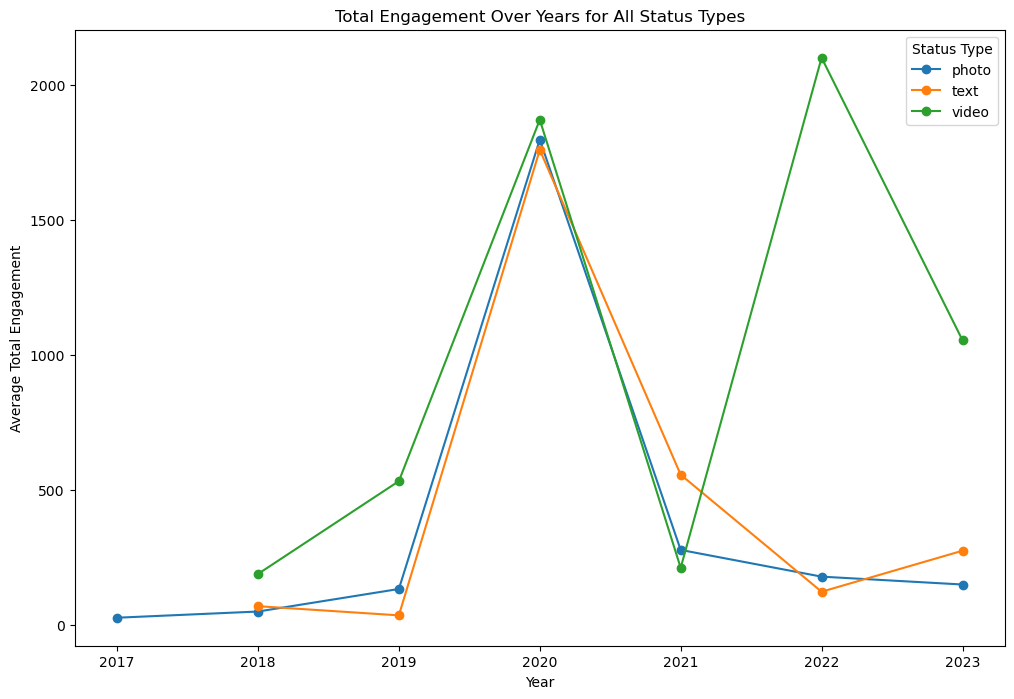

In [836]:
# Group by both 'status_type' and 'year' to calculate the mean of total engagement
grouped_data = df.groupby(['status_type', 'year'])['total_engagement'].mean().unstack('status_type')

# Plotting
plt.figure(figsize=(12, 8))

# Plot each status type with a different color
for column in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[column], label=column, marker='o', linestyle='-')

# Adding legend, title and labels
plt.legend(title='Status Type')
plt.title('Total Engagement Over Years for All Status Types')
plt.xlabel('Year')
plt.ylabel('Average Total Engagement')

# Show the plot
plt.show()


In [837]:
# Dropping unnecessary values
df.drop(columns = ['time_published','status_type','status_id','year','value',
                  'total_engagement'],
             axis    = 1,
             inplace = True,
             errors  = 'ignore')

In [838]:
# pearson correlation
df_corr = df.corr(method = 'pearson').round(decimals = 4)

# checking results
print(f"""
Point-Biserial Correlations
---------------------------
{df_corr.loc[ : , 'photo' ].sort_values(ascending = False)} \n\n
{df_corr.loc[ : , 'text' ].sort_values(ascending = False)} \n\n
{df_corr.loc[ : , 'video' ].sort_values(ascending = False)} """)



Point-Biserial Correlations
---------------------------
photo           1.0000
num_sads       -0.0645
num_wows       -0.0864
num_angrys     -0.0953
num_likes      -0.1226
num_hahas      -0.1901
num_comments   -0.3098
text           -0.3332
num_loves      -0.3496
num_shares     -0.3724
video          -0.8656
Name: photo, dtype: float64 


text            1.0000
num_likes       0.1402
num_sads       -0.0006
num_wows       -0.0129
num_angrys     -0.0323
num_hahas      -0.0396
num_comments   -0.0609
num_loves      -0.0754
num_shares     -0.0784
video          -0.1837
photo          -0.3332
Name: text, dtype: float64 


video           1.0000
num_shares      0.4300
num_loves       0.4045
num_comments    0.3553
num_hahas       0.2192
num_angrys      0.1165
num_wows        0.0970
num_sads        0.0675
num_likes       0.0533
text           -0.1837
photo          -0.8656
Name: video, dtype: float64 


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h1> QUESTION 3 </h1> 
<br>
Develop principal components (PCA) based on the available social media metrics in the dataset. You may choose to group or exclude metrics as you see fit. 
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


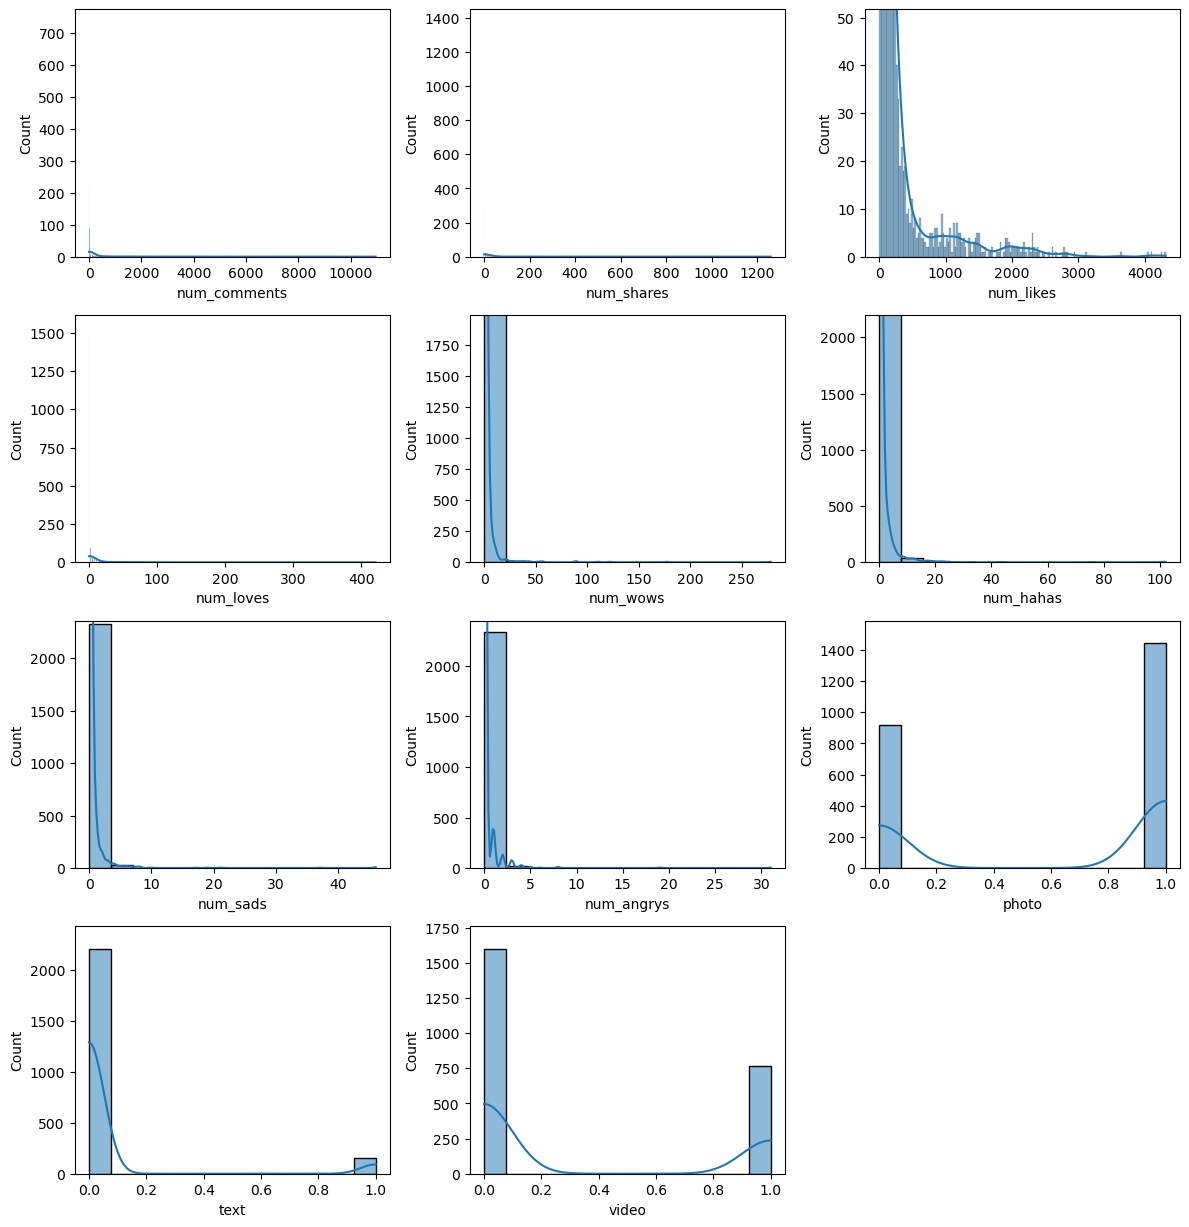

In [839]:
# Assessing the variables and their distribution

# setting figure size
fig, ax = plt.subplots(figsize=(12, 15))
ax.remove()  # Removing the initial unused Axes object

# initializing a counter
count = 0

# looping to create visualizations
for col in df:
    # condition to break
    if count == 15:
        break

    # increasing count
    count += 1

    # preparing histograms
    ax = plt.subplot(5, 3, count)  # Create a subplot and store its axis
    sns.histplot(x=df[col], kde=True)  # Plot histogram

    # Set the y-axis limit to the maximum count in the histogram + 10% for some padding
    max_count = df[col].value_counts().max() * 1.1
    ax.set_ylim(0, max_count)  # Set y-axis limits

# formatting, saving, and displaying the plot
plt.tight_layout()
plt.show()


In [840]:
#Creating a list of continuous x-variables

x_continuous = ['num_comments', 'num_shares', 'num_likes', 'num_loves', 
                 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

In [841]:
#Scaling the data to preparing it for Principal Component Analysis 

df_scaled = scaler(df[x_continuous])

df_scaled.head(n=5)

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,-0.272992,-0.321784,-0.152281,-0.312945,-0.147121,-0.180036,-0.141365,-0.135811
1,-0.270656,-0.297543,-0.040983,-0.142167,-0.032397,-0.180036,-0.141365,-0.135811
2,-0.268320,-0.321784,-0.045264,-0.117770,-0.032397,-0.180036,-0.141365,-0.135811
3,-0.156194,-0.079368,0.175192,0.248183,-0.032397,1.036338,-0.141365,-0.135811
4,-0.070931,0.058001,-0.190807,0.077405,-0.032397,-0.180036,0.401568,-0.135811


In [842]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 702)


# FITTING and TRANSFORMING the scaled data
df_pca = pca.fit_transform(df_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", df_scaled.shape)
print("PCA shape     :", df_pca.shape)

Original shape: (2362, 8)
PCA shape     : (2362, 8)


In [843]:
pd.DataFrame(data = df_pca)

,0,1,2,3,4,5,6,7
0,-0.619670,-0.006476,0.031211,-0.028140,0.069438,0.030553,0.011254,-0.000399
1,-0.469623,0.126667,0.013848,-0.028868,0.082735,-0.020934,-0.053784,-0.088186
2,-0.469004,0.125796,0.015559,-0.028346,0.089355,-0.017813,-0.058132,-0.121798
3,0.367677,0.240069,-0.089732,-0.314233,0.234662,0.932251,-0.089207,-0.068756
4,-0.019679,-0.278149,-0.276109,0.109002,0.151739,-0.213950,-0.170986,-0.007108
...,...,...,...,...,...,...,...,...
2357,-0.430884,0.084652,-0.004706,-0.030780,-0.039773,0.007068,-0.111433,-0.051283
2358,-0.667096,-0.222189,0.133994,-0.100760,0.215334,-0.003407,-0.002229,-0.001872
2359,-0.668470,-0.228442,0.136973,-0.102865,0.219563,-0.004391,-0.002620,-0.001914
2360,-0.669158,-0.231568,0.138463,-0.103917,0.221677,-0.004884,-0.002815,-0.001936


In [844]:
# checking pre- and post-scaling variance
print(np.var(df[x_continuous]).round(2), '\n\n')
print(np.var(df_scaled))

num_comments    733040.53
num_shares       15315.11
num_likes       218288.81
num_loves         1680.09
num_wows            75.98
num_hahas           16.90
num_sads             3.39
num_angrys           0.82
dtype: float64 


num_comments    1.0
num_shares      1.0
num_likes       1.0
num_loves       1.0
num_wows        1.0
num_hahas       1.0
num_sads        1.0
num_angrys      1.0
dtype: float64


/Users/reecharajsingh/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3745: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


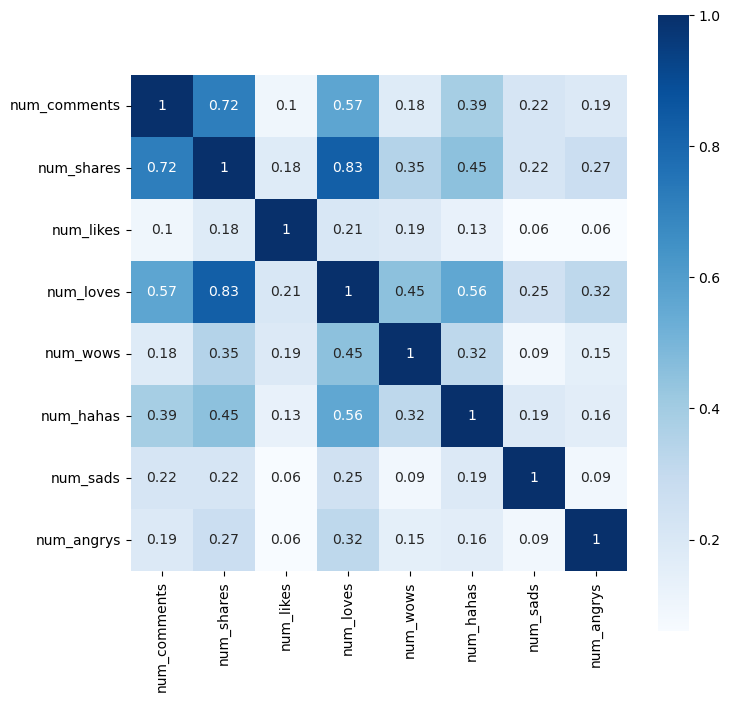

In [845]:
# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = df_scaled.corr(method = 'pearson').round(decimals = 2)


# creating a correlation heatmap
sns.heatmap(data   = df_corr,
            cmap   = 'Blues',
            square = True,
            annot  = True)


# rendering the heatmap
plt.show()

In [846]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PCA {component_number}: {variance.round(decimals = 2)}")

PCA 1: 0.41
PCA 2: 0.13
PCA 3: 0.11
PCA 4: 0.11
PCA 5: 0.1
PCA 6: 0.08
PCA 7: 0.04
PCA 8: 0.02


In [847]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum(axis = 0))

1.0


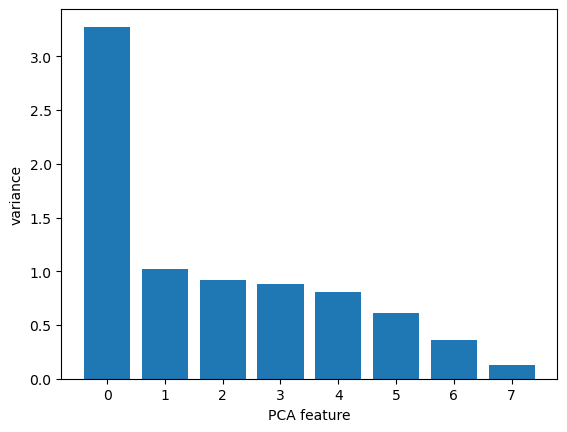

In [848]:
# Intrinsic Dimension
pca = PCA (n_components = 8)
pca.fit(df_scaled)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>QUESTION 3.1</h3>
<br>
Develop a scree plot and determine how many principal components you would like to retain. Draw a vertical line in the scree plot to indicate your cutoff point. Explain your rationale. (minimum 5 sentences)
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
Principal Component 1 (PC1) strongly correlats with num_shares and num_loves i.e. it captures variance related to content that is both widely shared and loved. This component could be interpreted as an indicator of highly shareable and emotionally engaging content that prompts users to not only engage by liking but also by sharing with their network.
<br>
Principal Component 2 (PC2) shows a strong correlation with num_likes, which points to it capturing variance primarily related to the general popularity of a post and which could reflect a broad appeal or a safe choice that users are willing to endorse.
<br>
Principal Component 3 (PC3) has a negative correlation with num_sads and a strong positive correlation with num_angrys. It seems to encapsulate content that polarizes audience emotions, distinguishing between content that elicits sadness and content that may provoke anger or frustration. This component captures the more nuanced emotional engagement with content, differentiating between posts that might be controversial or thought-provoking and those that could be perceived as negative or disheartening.
<br>
<h4> Decision to restrict inclusion to top 3 Principal Components </h4>
<br>
<h5>Variability Explanation:</h5> The first three PCs likely explain a substantial portion of the total variance in the data, which allows for a simplified yet comprehensive view of the engagement patterns.
<br>
<h5>Balance of Specificity and Generality:</h5> PC1 and PC2 seem to represent general engagement and popularity, while PC3 introduces an element of emotional specificity without becoming too detailed.
<br>
<h5>Ease of Interpretation:</h5> The risk of overcomplicating the model with additional components that might explain only marginal variances is mitigated.
<br>
<h5>Operational Efficiency:</h5> Using fewer PCs is understood to be more efficient and can help bring focus to the analysis. 


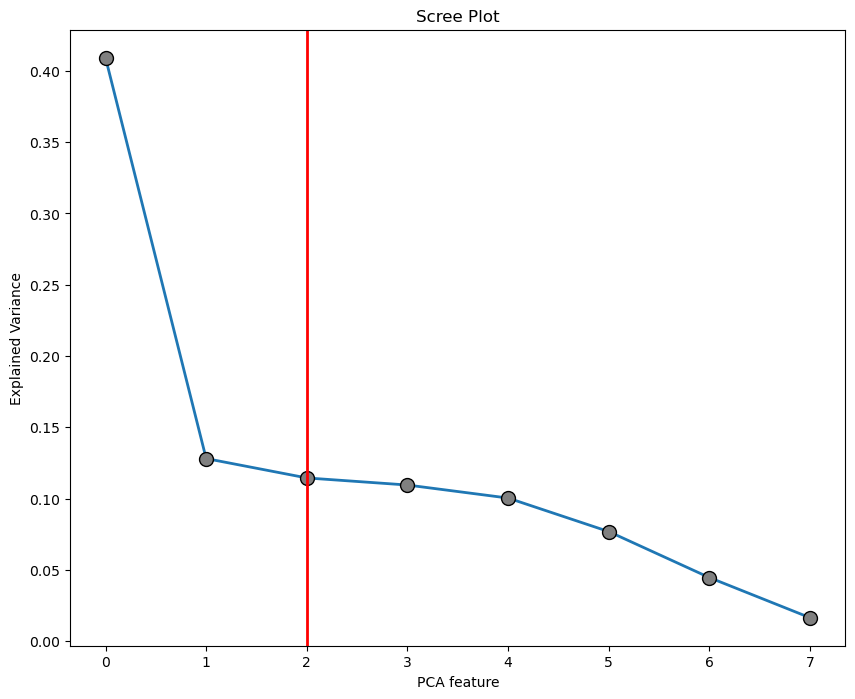

In [849]:
# calling the scree_plot function
scree_plot(pca_object = pca)
plt.axvline(x=2, color='red', linewidth=2) 
plt.show() 


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3> Question 3.2 </h3>
<br>
Present the factor loadings for the retained principal components (correlations with the original features), rounded to two decimal places.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


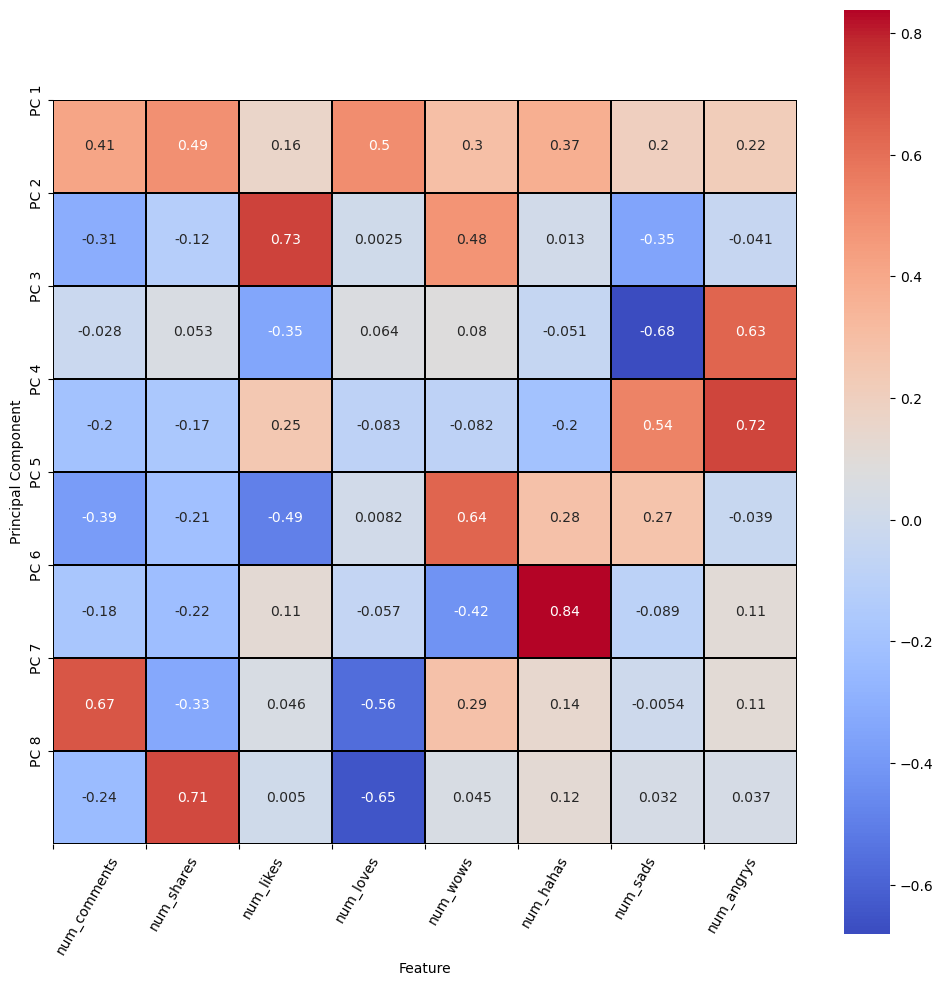

In [850]:
# setting plot size
fig, ax = plt.subplots(figsize = (12, 12))


# developing a PC to feature heatmap
sns.heatmap(pca.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')


# setting more plot options
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7],
           ["PC 1", "PC 2", "PC 3", "PC 4", "PC 5", "PC 6", "PC 7", "PC 8"])

plt.xticks(range(0, 8),
           df_scaled.columns,
           rotation=60,
           ha='left')

plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")


# displaying the plot
plt.show()

In [853]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components=3, random_state=702)

# FITTING and TRANSFORMING the purchases_scaled
pca_3_fit = pca_3.fit_transform(df_scaled)

# transposing pca components (use pca_3_fit here if you want the transformed data)
# Since you're using pca.components_, it should be pca_3, not pca
factor_loadings_3 = pd.DataFrame(np.transpose(pca_3.components_)).round(decimals = 2)

# naming rows as original features
factor_loadings_3.index = df_scaled.columns

# checking the result
print(factor_loadings_3)

# saving to Excel
factor_loadings_3.to_excel(excel_writer = 'factor_loadings_3.xlsx', index = True)


                 0     1     2
num_comments  0.41 -0.31 -0.03
num_shares    0.49 -0.12  0.05
num_likes     0.16  0.73 -0.35
num_loves     0.50  0.00  0.06
num_wows      0.30  0.48  0.08
num_hahas     0.37  0.01 -0.05
num_sads      0.20 -0.35 -0.68
num_angrys    0.22 -0.04  0.63


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3> Question 3.3 </h3>
<br>
Interpret each of your retained principal components. Remember to interpret both sides of each principal component. (minimum 5 sentences per principal component)
Rename each principal component based on your interpretation of what it represents.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>INTERPRETATIONS</h4>
<br>
The factor loadings matrix provides insights into how each principal component (PC) is correlated with each of the various engagement metrics. We will now analyze the spectrum of loadings to determine personas or archetypes that characterize each principal component based on which metrics are most influential.


<h4>Principal Component 1 (PC1)</h4>

<h5>Characteristics:</h5>

Strong positive loadings on num_loves (0.50), num_shares (0.49), and num_comments (0.41).
Moderate positive loading on num_hahas (0.37), num_wows (0.30) and num_angrys (0.22).

<h5>Interpretation:</h5>

PC1 aka "The Emotionally Engaging": This persona demonstrates widespread sharing and emotional engagement. They score high on loving, sharing, and commenting on posts, suggesting a more positive emotional reaction. These might be heartwarming, funny, or otherwise emotional posts.

<h4> Principal Component 2 (PC2)</h4>

<h5>Characteristics:</h5>

Strong positive loading on num_likes (0.73), and num_wows (0.48).
Negative loadings on num_comments (-0.31) and num_sads (-0.35).

<h5>Interpretation:</h5>

PC2 appears to represent the "The Passively Positive" persona. Content that ranks high on this component is typically well-liked and somewhat surprising or impressive (as indicated by wows), but doesn't necessarily provoke much discussion (comments) or negative sentiments. These might be visually stunning or generally agreeable posts that garner appreciation but less interactive engagement.

<h4>Principal Component 3 (PC3)</h4>

<h5>Characteristics:</h5>

Strong positive loading on num_angrys (0.63).
Strong negative loading on num_sads (-0.68), and num_likes (-0.35).

<h5>Interpretation:</h5>

PC3 represents a "The Instigator" persona. This component identifies content that tends to elicit strong emotional reactions but in opposing directions—anger versus sadness. Such content could be controversial or evocative, triggering polarized responses among the audience. This might include political content, social commentary, or provocative posts.

In [854]:
# naming each principal component
factor_loadings_3.columns = ['The Emotionally Engaging', # + LOVE, + SHARE, + COMMENT
                             'The Passively Positive', # ++ LIKES, , + WOWs, - SAD, - COMMENTS
                             'The Instigator']   # ++ ANGRY, --SAD, - LIKES


# checking the result
factor_loadings_3.round(decimals = 2)

,The Emotionally Engaging,The Passively Positive,The Instigator
num_comments,0.41,-0.31,-0.03
num_shares,0.49,-0.12,0.05
num_likes,0.16,0.73,-0.35
num_loves,0.50,0.00,0.06
num_wows,0.30,0.48,0.08
num_hahas,0.37,0.01,-0.05
num_sads,0.20,-0.35,-0.68
num_angrys,0.22,-0.04,0.63


In [855]:
# analyzing factor strengths per customer
factor_loadings = pca_3.transform(df_scaled)


# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings)


# renaming columns
factor_loadings_df.columns = factor_loadings_3.columns


# checking the results
factor_loadings_df.head(n = 15)

,The Emotionally Engaging,The Passively Positive,The Instigator
0,-0.619670,-0.006476,0.031211
1,-0.469623,0.126667,0.013848
2,-0.469004,0.125796,0.015559
3,0.367677,0.240069,-0.089732
4,-0.019679,-0.278149,-0.276109
5,-0.403725,0.153926,0.006237
6,-0.654551,-0.184083,0.115799
7,-0.551121,-0.004078,0.104165
8,-0.402630,0.251152,-0.040213
9,-0.538502,-0.100086,0.115163


In [856]:
# applying the unsupervised_scaler function
pca_rescaled = scaler(df = factor_loadings_df)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df), '\n\n')
print(np.var(pca_rescaled))

The Emotionally Engaging    3.273609
The Passively Positive      1.025052
The Instigator              0.916344
dtype: float64 


The Emotionally Engaging    1.0
The Passively Positive      1.0
The Instigator              1.0
dtype: float64


/Users/reecharajsingh/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3745: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3> QUESTION 4 </h3> 
Develop segmentation with k-means clustering, using your retained principal components. You may also include additional features in your segmentation (avoid reusing features that were loaded into the principal components).
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>


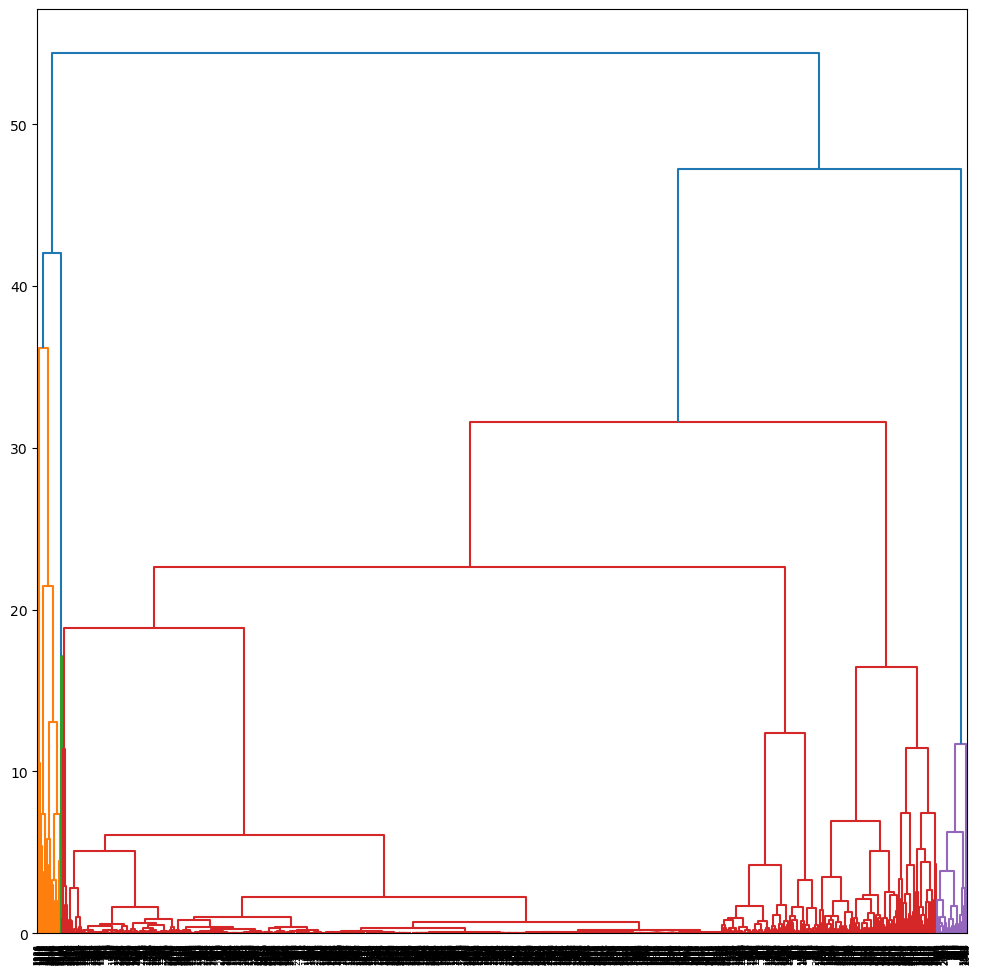

In [857]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_rescaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation  = 90       ,
           leaf_font_size = 6        )


# rendering the plot
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4> Question 4.1 </h4> Decide on an ideal number of clusters and explain your rationale. (minimum 5 sentences)
<br>
I experimented with Ward, Average, and Complete all of which resulted in the presentation of one large cluster with a variation of between 1-3 additional smaller clusters. 
After reviewing each of the cluster breakdowns, I assessed the count of observations within each cluster and noted that there was a significant decline in the observations per cluster for the smaller clusters.
Notably they were below 100 and that would not have been ideal for further analysis. 
The review above led me to select 2 clusters as the ideal number

In [796]:
# INSTANTIATING a k-Means object with clusters
posts_k_pca = KMeans(n_clusters   = 2  ,
                         n_init       = 'auto',
                         random_state = 702   )


# fitting the object to the data
posts_k_pca.fit(pca_rescaled)


# converting the clusters to a DataFrame
posts_kmeans_pca = pd.DataFrame({'Cluster': posts_k_pca.labels_})


# checking the results
print(posts_kmeans_pca.iloc[: , 0].value_counts())

Cluster
1    2208
0     154
Name: count, dtype: int64


In [797]:
# storing cluster centers
centroids_pca = posts_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca).round(decimals = 2)


# renaming principal components
centroids_pca_df.columns = ['The Emotionally Engaging',
                             'The Passively Positive',
                             'The Instigator']


# checking results (clusters = rows, pc = columns)
centroids_pca_df

,The Emotionally Engaging,The Passively Positive,The Instigator
0,1.12,2.67,-1.04
1,-0.08,-0.19,0.07


In [798]:
# Concatenating cluster memberships with principal components
clst_pca_df = pd.concat([posts_kmeans_pca, factor_loadings_df], axis=1)

# Creating a new column 'status_type' in df based on the values in 'photo', 'text', 'video'
conditions = [
    df['photo'] == 1,
    df['text'] == 1,
    df['video'] == 1
]
choices = ['photo', 'text', 'video']
df['status_type'] = np.select(conditions, choices, default=np.nan)

# Dropping the old binary columns
df = df.drop(['photo', 'text', 'video'], axis=1)

# Concatenating demographic information with pca-clusters
final_df = pd.concat([df.loc[:, ['status_type']], clst_pca_df.round(decimals=2)], axis=1)

# Renaming columns
final_df.columns = ['Status_Type', 'Cluster', 'The Emotionally Engaging', 'The Passively Positive', 'The Instigator']

# Checking the results
final_df.head(n=10)


,Status_Type,Cluster,The Emotionally Engaging,The Passively Positive,The Instigator
0,photo,1,-0.62,-0.01,0.03
1,photo,1,-0.47,0.13,0.01
2,photo,1,-0.47,0.13,0.02
3,video,1,0.37,0.24,-0.09
4,video,1,-0.02,-0.28,-0.28
5,photo,1,-0.40,0.15,0.01
6,video,1,-0.65,-0.18,0.12
7,photo,1,-0.55,-0.00,0.10
8,photo,1,-0.40,0.25,-0.04
9,photo,1,-0.54,-0.10,0.12


In [799]:
final_df['Cluster'].value_counts()

Cluster
1    2208
0     154
Name: count, dtype: int64

In [800]:
# renaming clusters
cluster_names = {0 : '1',
                 1 : '2'}


final_df['Cluster'].replace(cluster_names, inplace = True)


# checking results
final_df.head(n = 5)

,Status_Type,Cluster,The Emotionally Engaging,The Passively Positive,The Instigator
0,photo,2,-0.62,-0.01,0.03
1,photo,2,-0.47,0.13,0.01
2,photo,2,-0.47,0.13,0.02
3,video,2,0.37,0.24,-0.09
4,video,2,-0.02,-0.28,-0.28


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>Question 4.2 </h4> Present and interpret each segment using cluster centroids and give an example of a "normal" post for each segment. (minimum 5 sentences per segment)
<h4>Question 4.3 </h4>Rename each segment based on your interpretation of what it represents.
<h4>Question 4.4 </h4>Analyze the status types of each segment and report any findings related to photos. (minimum 5 sentences)
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [801]:
# Ensure 'Cluster' is of type string if it's not already
final_df['Cluster'] = final_df['Cluster'].astype(str)

# Calculate the proportion of observations in Cluster 1
cluster_1_count = (final_df['Cluster'] == '1').sum()
total_count = len(final_df)
proportion_cluster_1 = round(cluster_1_count / total_count, 2) if total_count > 0 else 0

# Retrieve the centroid values for Cluster 1 if they exist
centroid_info = centroids_pca_df.loc[0, :].to_string(dtype =False, name=False) if 0 in centroids_pca_df.index else "No centroid data available"

# Retrieve status type distribution for Cluster 1, handle empty Series
status_type_counts = final_df.loc[final_df['Cluster'] == '1', 'Status_Type']
status_type_distribution = status_type_counts.value_counts(normalize=True).round(decimals=2).sort_index().to_string(dtype =False, name=False) \
    if not status_type_counts.empty else "No data available"

# Dynamic string with checks
print(f"""\
 -----------
| Cluster 1 |
 -----------

Proportion of Observations
--------------------------
{proportion_cluster_1}


Centroids
---------
{centroid_info}


Status Type
-----------
{status_type_distribution}
""")


 -----------
| Cluster 1 |
 -----------

Proportion of Observations
--------------------------
0.07


Centroids
---------
The Emotionally Engaging    1.12
The Passively Positive      2.67
The Instigator             -1.04


Status Type
-----------
Status_Type
photo    0.47
text     0.18
video    0.34



<h3> Cluster 1: The Significantly Sentimental </h3>
<br>
<h4> Proportion of Observations:</h4> This segment accounts for 7% of the observations, indicating a small but specific group within the overarching platform. 
<br>
<h4>Centroids:</h4>
<br>
The Emotionally Engaging: With a score of 1.12, this segment seems to respond well to content that is sentimental in nature, suggesting that posts invoking personal stories or experiences could perform well.
<br>
The Passively Positive: The high score of 2.67 suggests these users engage through passive positive actions, like likes or loves, rather than active engagement such as comments or shares.
<br>
The Instigator: A negative score (-1.04) indicates that this segment is less likely to react with strong negative emotions like anger or sadness.
<br>
<h4>Normal Post:</h4> A typical post that might appeal to this segment could be a heartfelt story about a customer's experience with a product.
<br>
<h4>Status Types Analysis:</h4> With photos being the dominant type at 47%, it suggests that while this group is smaller, they engage well with visual content with videos being the next largest type of post that encourages engagement within the group. 

In [802]:
# Ensure 'Cluster' is of type string if it's not already
final_df['Cluster'] = final_df['Cluster'].astype(str)

# Calculate the proportion of observations in Cluster 2
cluster_2_count = (final_df['Cluster'] == '2').sum()
total_count = len(final_df)
proportion_cluster_2 = round(cluster_2_count / total_count, 2) if total_count > 0 else 0

# Retrieve the centroid values for Cluster 2 if they exist
centroid_info = centroids_pca_df.loc[0, :].to_string(dtype =False, name=False) if 0 in centroids_pca_df.index else "No centroid data available"

# Retrieve status type distribution for Cluster 1, handle empty Series
status_type_counts = final_df.loc[final_df['Cluster'] == '2', 'Status_Type']
status_type_distribution = status_type_counts.value_counts(normalize=True).round(decimals=2).sort_index().to_string(dtype =False, name=False) \
    if not status_type_counts.empty else "No data available"

# Dynamic string with checks
print(f"""\
 -----------
| Cluster 2 |
 -----------

Proportion of Observations
--------------------------
{proportion_cluster_2}


Centroids
---------
{centroid_info}


Status Type
-----------
{status_type_distribution}
""")


 -----------
| Cluster 2 |
 -----------

Proportion of Observations
--------------------------
0.93


Centroids
---------
The Emotionally Engaging    1.12
The Passively Positive      2.67
The Instigator             -1.04


Status Type
-----------
Status_Type
photo    0.62
text     0.06
video    0.32



<h3> Cluster 2: The Mass Majority </h3>
<br>
<h4>Proportion of Observations:</h4> Representing the majority at 93%, this segment is indicative of the general trend within the audience.
<br>
<h4>Centroids:</h4>
<br>
The Emotionally Engaging: Mirroring Segment 1, they have a similar tendency to engage with content that touches on emotional aspects, as indicated by the score of 1.12.
The Passively Positive: Also identical to Segment 1 with a score of 2.67, showing a propensity for passive engagement.
The Instigator: The same as Segment 1 with a score of -1.04, suggesting this larger segment also shies away from negatively charged engagement.
<br>
<h4>Normal Post:</h4> A regular post for this segment might include visually captivating content, such as high-quality photos of products, possibly with promotions or discounts. 
<br>
<h4>Status Types Analysis: </h4>Photos are even more prevalent here, with 62% engagement.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>SECTION 5 & 6 </h3><br>
Question 5: Develop three logistic regression models (1 = photo, 0 = not photo), each based on the following x-features. <br>
Model 1: Original x-features <br>
Model 2: Retained principal components <br>
Model 3: Retained clusters <br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
Question 6: Select your best model from above and present the following: <br>
Your rationale for why this is the best model. (minimum 5 sentences) <br>
Model results: train-test gap based on accuracy and AUC score based on the results of the .predict step) <br>
Confusion matrix: Explain each error and its associated risks for the business. (minimum 5 sentences)

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [803]:
df.head(n=10)

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type
0,0,0,150,0,0,0,0,0,photo
1,2,3,202,7,1,0,0,0,photo
2,4,0,200,8,1,0,0,0,photo
3,100,30,303,23,1,5,0,0,video
4,173,47,132,16,1,0,1,0,video
5,15,1,221,12,1,0,0,0,photo
6,0,1,37,0,0,0,0,0,video
7,0,0,81,2,2,0,0,0,photo
8,8,0,281,11,1,0,0,0,photo
9,11,6,61,4,1,0,0,0,photo


In [804]:
# One-hot encoding the 'status_type' column
oh_status_type = pd.get_dummies(df['status_type'])

# Step 1: Inspect Data Types
print("Data Types in one-hot encoded DataFrame:")
print(oh_status_type.dtypes)
print("\nData Types in original DataFrame:")
print(df.dtypes)

# Step 2: Explicit Type Conversion (workaround as the initial code resulted in True and False outputs)
oh_status_type = oh_status_type.astype(int)

# Step 3: Join test with simple DataFrame
test_df = pd.DataFrame({'key': range(len(df)), 'value': range(len(df))})
df = df.join(test_df.set_index('key'))

# Join one-hot encoded DataFrame to the original DataFrame
df = pd.concat([df, oh_status_type], axis=1)

# Display the first few rows to verify
print("Updated DataFrame after joining:")
df.head(n=10)

Data Types in one-hot encoded DataFrame:
photo    bool
text     bool
video    bool
dtype: object

Data Types in original DataFrame:
num_comments     int64
num_shares       int64
num_likes        int64
num_loves        int64
num_wows         int64
num_hahas        int64
num_sads         int64
num_angrys       int64
status_type     object
dtype: object
Updated DataFrame after joining:


,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type,value,photo,text,video
0,0,0,150,0,0,0,0,0,photo,0,1,0,0
1,2,3,202,7,1,0,0,0,photo,1,1,0,0
2,4,0,200,8,1,0,0,0,photo,2,1,0,0
3,100,30,303,23,1,5,0,0,video,3,0,0,1
4,173,47,132,16,1,0,1,0,video,4,0,0,1
5,15,1,221,12,1,0,0,0,photo,5,1,0,0
6,0,1,37,0,0,0,0,0,video,6,0,0,1
7,0,0,81,2,2,0,0,0,photo,7,1,0,0
8,8,0,281,11,1,0,0,0,photo,8,1,0,0
9,11,6,61,4,1,0,0,0,photo,9,1,0,0


In [805]:
# Dropping unnecessary values
df.drop(columns = ['status_type', 'value', 'video', 'text'],
             axis    = 1,
             inplace = True,
             errors  = 'ignore')

df.head(n=10)

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,photo
0,0,0,150,0,0,0,0,0,1
1,2,3,202,7,1,0,0,0,1
2,4,0,200,8,1,0,0,0,1
3,100,30,303,23,1,5,0,0,0
4,173,47,132,16,1,0,1,0,0
5,15,1,221,12,1,0,0,0,1
6,0,1,37,0,0,0,0,0,0
7,0,0,81,2,2,0,0,0,1
8,8,0,281,11,1,0,0,0,1
9,11,6,61,4,1,0,0,0,1


In [806]:
# survival proportions
df.loc[ : ,'photo'].value_counts(normalize = True).round(decimals = 2)

photo
1    0.61
0    0.39
Name: proportion, dtype: float64

In [807]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   num_comments  2362 non-null   int64
 1   num_shares    2362 non-null   int64
 2   num_likes     2362 non-null   int64
 3   num_loves     2362 non-null   int64
 4   num_wows      2362 non-null   int64
 5   num_hahas     2362 non-null   int64
 6   num_sads      2362 non-null   int64
 7   num_angrys    2362 non-null   int64
 8   photo         2362 non-null   int64
dtypes: int64(9)
memory usage: 166.2 KB


In [808]:
x_continuous = ['num_comments', 'num_shares', 'num_likes', 'num_loves', 
                'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

In [809]:
# standardizing X-data (st = scaled and transformed)
x_data_st = standard_scaler(df = df[x_continuous])


# checking results
x_data_st.describe(include = 'number').round(decimals = 2)

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00,2362.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.27,-0.32,-0.47,-0.31,-0.15,-0.18,-0.14,-0.14
25%,-0.27,-0.32,-0.44,-0.31,-0.15,-0.18,-0.14,-0.14
50%,-0.27,-0.32,-0.35,-0.31,-0.15,-0.18,-0.14,-0.14
75%,-0.25,-0.30,-0.08,-0.24,-0.15,-0.18,-0.14,-0.14
max,12.53,9.86,8.76,9.96,31.75,24.63,24.83,34.16


In [810]:
# declaring explanatory variables
photo_data = x_data_st


# declaring response variable
photo_target = df.loc[ : , 'photo']

In [811]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            photo_data,
            photo_target,
            test_size    = 0.20,
            random_state = 702,
            stratify     = photo_target) 


# merging training data for statsmodels
photo_train = pd.concat([x_train, y_train], axis = 1)

In [812]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
photo
1    0.61
0    0.39
Name: proportion, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
photo
1    0.61
0    0.39
Name: proportion, dtype: float64



In [813]:
for val in photo_data:
    print(f" {val} + ")

 num_comments + 
 num_shares + 
 num_likes + 
 num_loves + 
 num_wows + 
 num_hahas + 
 num_sads + 
 num_angrys + 


In [814]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  photo ~
                                          num_comments + 
                                          num_shares + 
                                          num_likes + 
                                          num_loves + 
                                          num_wows + 
                                          num_hahas + 
                                          num_sads + 
                                          num_angrys""",
                                         data    = photo_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.521492
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: photo            Pseudo R-squared: 0.220      
Date:               2024-04-14 20:36 AIC:              1988.1981  
No. Observations:   1889             BIC:              2038.0924  
Df Model:           8                Log-Likelihood:   -985.10    
Df Residuals:       1880             LL-Null:          -1262.5    
Converged:          1.0000           LLR p-value:      1.2119e-114
No. Iterations:     10.0000          Scale:            1.0000     
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      -0.4897    0.1516  -3.2311  0.0012  -0.7868  -0.1927
num_comments   -3.2196    0.7533  -4.2740  0.0000  -4.6961  -1.7432
num_shares     -0.3616    0.3039  -1.1897  0.2341  -0.9572   0.2341
num_likes      -0.1799    0.0534  -3.3674  0.0008  -0.2847  -0.0752
num_loves      -1.7259    0.4526  -3.8130  0.0001  -2.6130  -0.8387
num_wows        0.4599    0.0794   5.7902  0.0000   0.3042   0.6156
num_hahas      -0.1173    0.1046  -1.1217  0.2620  -0.3224   0.0877
num_sads        0.0909    0.1291   0.7047  0.4810  -0.1620   0.3439
num_angrys      0.0784    0.1050   0.7461  0.4556  -0.1275   0.2842
==================================================================

"""

In [815]:
# INSTANTIATING a logistic regression model
logreg = sklearn.linear_model.LogisticRegression(solver = 'lbfgs',
                                                 C = 1,
                                                 random_state = 702)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)

# saving scoring data for future use
train_score = round(logreg_fit.score(x_train, y_train), ndigits = 4) # train accuracy
test_score  = round(logreg_fit.score(x_test, y_test),   ndigits = 4) # test accuracy
tt_gap      = round(abs(train_score - test_score),      ndigits = 4) # gap

# displaying and saving the gap between training and testing
print(f"""\
Training ACCURACY: {train_score}
Testing  ACCURACY: {test_score}
Train-Test Gap   : {tt_gap}
""") 

Training ACCURACY: 0.7507
Testing  ACCURACY: 0.7378
Train-Test Gap   : 0.0129



In [816]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 70
False Positives: 114
False Negatives: 10
True Positives : 279



In [817]:
# preparing AUC, precision, and recall
auc       = round(roc_auc_score(y_true = y_test, y_score = logreg_pred) , ndigits = 4)
precision = round(precision_score(y_true = y_test, y_pred = logreg_pred), ndigits = 4)
recall    = round(recall_score(y_true = y_test, y_pred = logreg_pred)   , ndigits = 4)


# dynamically printing metrics
print(f"""\
AUC:       {auc}
Precision: {precision}
Recall:    {recall}
""")

AUC:       0.6729
Precision: 0.7099
Recall:    0.9654



<h2> RETAINED PRINCIPAL COMPONENTS <h2>

In [818]:
# selecting x- and y-data
x_data_pca = pca_rescaled
y_data_pca = df['photo']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data_pca,
                                                    y_data_pca,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data_pca)

In [819]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)

print(f"""
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.009
Test AUC Score: 0.665



In [820]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 84
False Positives: 146
False Negatives: 13
True Positives : 348



<h2> RETAINED CLUSTERS <h2>

In [821]:
# factorizing cluster results 
cluster_df = pd.get_dummies(data       = customers_kmeans_pca['Cluster'],
                            drop_first = True).astype(dtype = int)


# checking results
cluster_df.value_counts(normalize = False).sort_index(ascending = False)

1  2
1  0    2138
0  1      89
   0     135
Name: count, dtype: int64

In [822]:
x_data_cluster = cluster_df
y_data_cluster = df['photo']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data_cluster,
                                                    y_data_cluster,
                                                    test_size    = 0.20,
                                                    random_state = 702,
                                                    stratify     = y_data_cluster)

In [823]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true  = y_test,
                            y_score = model_pred)


print(f"""
Train-Test Gap: {round(abs(train_acc - test_acc), ndigits = 3)}
Test AUC Score: {round(roc_score, ndigits = 3)}
""")


Train-Test Gap: 0.02
Test AUC Score: 0.525



In [824]:
# storing cluster centers
centroids_pca = pd.DataFrame(data = posts_k_pca.cluster_centers_)


# checking cluster centers
centroids_pca.round(decimals = 2)

,0,1,2
0,1.12,2.67,-1.04
1,-0.08,-0.19,0.07


In [825]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 11
False Positives: 173
False Negatives: 3
True Positives : 286



<h2> CONCLUSION <h2>

Three logistic regression models were developed i.e. the analysis of the models based on original x-features, retained principal components, and retained clusters yielded insightful results.
<br>
Model 1, which utilized original x-features, outperformed Model 2 (retained PCs) and 3 (retained clusters) based on KPIs considered. 
<br>
Its AUC score (0.6729) indicate robust predictability, while the train-test gap (0.0129) demonstrates minimal overfitting. 
<br>
<h5>Model Results:</h5>
Model 1 displayed a train-test accuracy gap of 0.0129, showcasing strong generalizability from the training data to unseen data. With an AUC of 0.6729, it reflects a fair discrimination ability for the positive class. The precision score of 0.7099 and recall of 0.9654 suggest the model is highly sensitive to detecting the positive class (photos) but at the expense of a moderate precision.
<br>
<h5>Confusion Matrix Analysis:</h5>
The confusion matrix revealed that Model 1 had relatively few false negatives (FN=10) compared to true positives (TP=279), indicating it is proficient at identifying photos. However, the false positives (FP=114) suggest that the model sometimes incorrectly predicts content as photos. These errors could lead businesses to mischaracterize their content, potentially skewing engagement strategy evaluations.
<br>
<h5>Business Implications:</h5>
Risks exists with incorrect identification that is denoted by False Negatives and False Positives. 
<br>
The risk associated with FN errors is underestimating the engagement potential of non-photo content, possibly leading to underutilization of effective video or text strategies. 
<br>
On the other hand, FP errors may cause overinvestment in photo-based content under the mistaken belief it generates more engagement. This could divert resources from other content forms that might resonate better with the audience. 
<br>
Accurate classification is crucial for optimizing content strategy and ensuring that engagement-driving content is correctly identified and leveraged for marketing purposes.
<br>
In conclusion, Model 1 stands out as the best choice for retail vendors in Thailand looking to understand the impact of different content types on customer engagement. It offers a robust framework for predicting and strategizing content deployment, which is essential for maintaining a competitive edge in the social commerce arena.
<br>
While Model 2 and Model 3 offer alternative views on the data through principal component and cluster-based approaches, they do not quite reach the level of accuracy and interpretability provided by Model 1. The original feature-based model presents a more comprehensive and practical solution for businesses to understand and act upon social media engagement patterns.